# Mental Health in Tech Survey - Data Analysis Project

### Contents

- **Timestamp:** The time in which the interview was conducted
- **Age:** Age of the participant
- **Gender:** Gender of the participant
- **Country:** Country in which the participant lives
- **state:** If you live in the United States, which state or territory do you live in?
- **self_employed:** Are you self-employed?
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees:** How many employees does your company or organization have?
- **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
- **tech_company:** Is your employer primarily a tech company/organization?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse   treatment resources?
- **leave:** How easy is it for you to take medical leave for a mental health condition?
- **mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
- **phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?
- **phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?
- **mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments:** Any additional notes or comments

## 1. Importing the data and configuring the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, average_precision_score
from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from helper.functions import report_DataFrame # custom package to helper functions

init_notebook_mode(connected=True)
sns.set(style="darkgrid", font_scale=1.5, palette='Set1')
%matplotlib inline


## 2. Loading and cleaning the dataset

First we check the head of the dataset to get to know the basics about the data that we are going to be using. We are also going to create a dictionary with the questions that each column represent (we are going to use it when we do the visualizations).

In [2]:
with open('data/questions.txt') as f:
    questions = dict(l.strip().split(':') for l in f)

survey = pd.read_csv('data/survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


For consistency with the rest of the dataset, we are going to make the _Timestamp, Age, Gender_ and _Country_ be all lowercase

In [3]:
survey.columns = [x.lower() for x in survey.columns]

Using the _info()_ function we can see the variable type of each column, as well as the number of values stored in each one of them

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
timestamp                    1259 non-null object
age                          1259 non-null int64
gender                       1259 non-null object
country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

As we can see, Some of the columns have less elements than others, that means that we have _NaN_ values in some of the rows. Lets use a _heatmap_ to highlight the elements that are missing

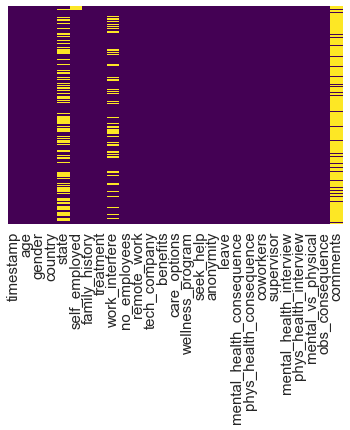

In [5]:
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The _comments_ column is mostly empty and we can do very little about it, so we are going to _drop_ it. The _state_ column (which records the state that the American participants live in) and the _timestamp_ are also of little use in the scope of our analysis, so lets drop those too. 

In [6]:
survey.drop(['comments','timestamp','state'], axis=1,inplace=True)

Now we are going to take a look at the *work_interfere* column to see if we can salvage anything from it. First we can check the percentage of _NaN_ values in the column

In [7]:
nan_values = survey['work_interfere'].isnull().sum()
total = len(survey.index)
print("{} % Of the values in the work_interfere column are NaN".format(round(100*nan_values/total,2)))

20.97 % Of the values in the work_interfere column are NaN


For now we decided to fill the _NaN_ values with the answer "Don't Know"

In [8]:
survey['work_interfere'].fillna("Don't know",inplace=True)

Finally, we can see that the *self_employed* column has some missing values, but it's such a small number that we can easily just drop those first rows. Then, lets just check if everything is clean with another _heatmap_

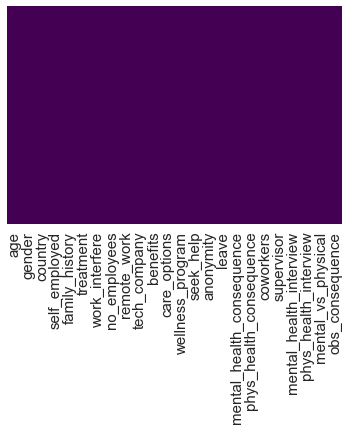

In [9]:
survey.dropna(inplace=True)

sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='viridis')
survey = survey.reset_index(drop=True)

Lets check the number of unique values in each column too further check for dirty data

In [10]:
print("Number of unique values in each column: \n")

for col in list(survey.columns):
    print(col,": ", survey[col].nunique())

Number of unique values in each column: 

age :  53
gender :  49
country :  48
self_employed :  2
family_history :  2
treatment :  2
work_interfere :  5
no_employees :  6
remote_work :  2
tech_company :  2
benefits :  3
care_options :  3
wellness_program :  3
seek_help :  3
anonymity :  3
leave :  5
mental_health_consequence :  3
phys_health_consequence :  3
coworkers :  3
supervisor :  3
mental_health_interview :  3
phys_health_interview :  3
mental_vs_physical :  3
obs_consequence :  2


Well, we might have a problem in the _gender_ column, there are 49 unique responses! 

In [11]:
print("Gender unique responses: {}".format(list(survey['gender'].unique())))

Gender unique responses: ['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile', 'Trans-female', 'Cis Female', 'F', 'something kinda male?', 'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you', 'Malr', 'p', 'femail', 'Cis Man', 'ostensibly male, unsure what that really means']


Although it's amazing to see such representativity in the data, we need to narrow it down a little bit to be able to analyze the data more easily and reliably. We are going to narrow it down to three categories: male, female and other/trans/non-binary

In [12]:
def gender_identifier(string):
    male_strings = ['male', 'Male', 'M', 'm', 'maile','Cis Male', 'Mal', 'Male (CIS)',  'Make', 
                    'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr','Cis Man']
    female_strings = ['Female', 'female','Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 
                      'Female ', 'cis-female/femme','Female (cis)','femail']
    other_strings = ['Trans-female','something kinda male?','queer/she/they','non-binary', 'Nah', 
                     'All', 'Enby', 'fluid', 'Genderqueer',  'Androgyne', 'Agender', 'Guy (-ish) ^_^', 
                     'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)','queer',   
                     'A little about you','p', 'ostensibly male, unsure what that really means', 'Male-ish']
    
    if string in male_strings:
        return 'male'
    elif string in female_strings:
        return 'female'
    elif string in other_strings:
        return 'other/non-binary/trans'
    
survey['gender'] = survey['gender'].apply(gender_identifier)

Lastly, we are going to fix the ages. Taking a look at the different values we can see that there are some responses that are not good, like negative numbers, numbers above 100 and even some ages below 12 yeas old. We are
going to delete those values and fill in the black with the _mean_ of the remaining ones

In [13]:
print("Age unique responses: {}".format(list(survey['age'].unique())))

Age unique responses: [46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24, 18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, -29, 43, 56, 60, 54, 329, 55, 99999999999, 48, 20, 57, 58, 47, 62, 51, 65, 49, -1726, 5, 53, 61, 8, 11, -1, 72]


In [14]:
#remove the unwanted values
def fix_age(age):
    if (age>100 or age<=12):
        return np.nan
    return round(age)

survey['age'] = survey['age'].apply(fix_age)

survey['age'].fillna(survey['age'].mean(),inplace=True)

survey['age'] = survey['age'].astype(int)

print("Age unique responses: {}".format(list(survey['age'].unique())))

Age unique responses: [46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24, 18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48, 20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72]


Looks like we finally have a clean data set! So we can move on to some exploratory data analysis!

In [15]:
survey.to_csv('data/survey_cleaned.csv')

# 2. Exploratory data Analysis and Visualizations

Our final goal is to predict whether or not an employee suoght treatment given his or hers perception of the work environment. We would also like to verify which of the factors contribute the most for that outcome.
	
So lets start with basics: plot the distribution of ages, genders and also  how much of our sample did an didn't seek treatment.

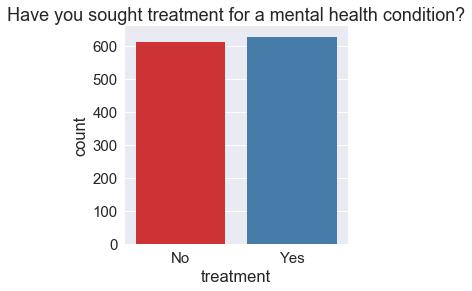

In [16]:
plt.figure(figsize=(4,4))
plt.title(questions['treatment'])

sns.countplot(survey['treatment'])

plt.show()

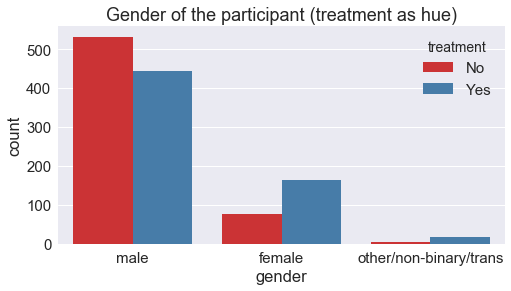

In [17]:
plt.figure(figsize=(8,4))
plt.title(questions['gender']+ " (treatment as hue)")

sns.countplot(x='gender', hue='treatment', data=survey)

plt.tight_layout
plt.show()

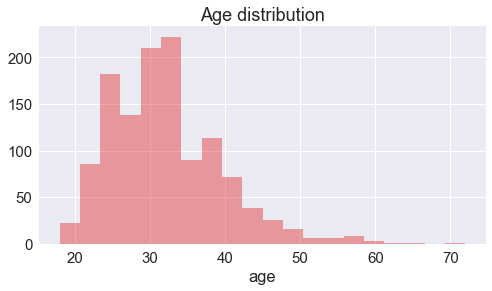

In [18]:
plt.figure(figsize=(8,4))
plt.title('Age distribution')

sns.distplot(survey['age'],kde=False, bins=20)

plt.tight_layout
plt.show()

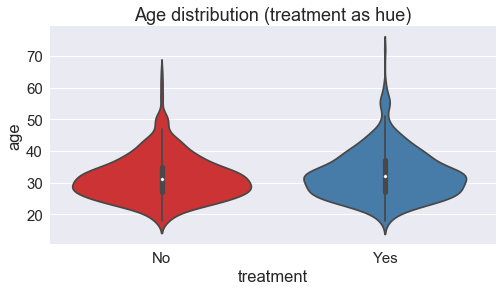

In [19]:
plt.figure(figsize=(8,4))
plt.title('Age distribution (treatment as hue)')

sns.violinplot(x="treatment", y="age", data=survey)

plt.tight_layout
plt.show()

#not much correlation between age and seeking treatment, the two ditributions look very similar

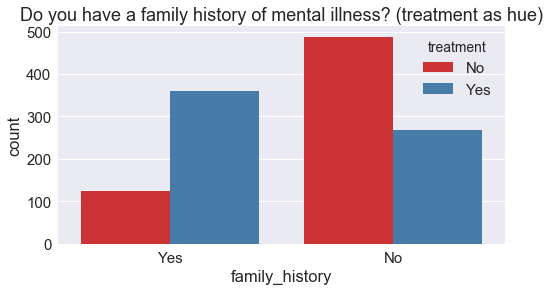

In [20]:
plt.figure(figsize=(8,4))
plt.title(questions['family_history']+ " (treatment as hue)")

sns.countplot(x='family_history', hue='treatment', data=survey)

plt.tight_layout
plt.show()

What conclusions we can take so far:
 
- Almost half of the participants haven’t sought any  kind of treatment;
- most of the participants are man. Also, women and other/trans/non-binary people are more likely to have sought treatment than man;
- most of the participants are adults in the early thirties;
- the distribution of ages for participants who have and who haven’t sought treatment is very similar, which suggests that the is not a strong correlation between the two (maybe just a little bit);
- most of the participants  didn’t have family history, but those who did were more likely to have sought treatment than those who didn’t;


### 2.1 Analyzing the impacts of the work environment

Now we are going to verify the impact that some aspects of the work environment might have on the matter

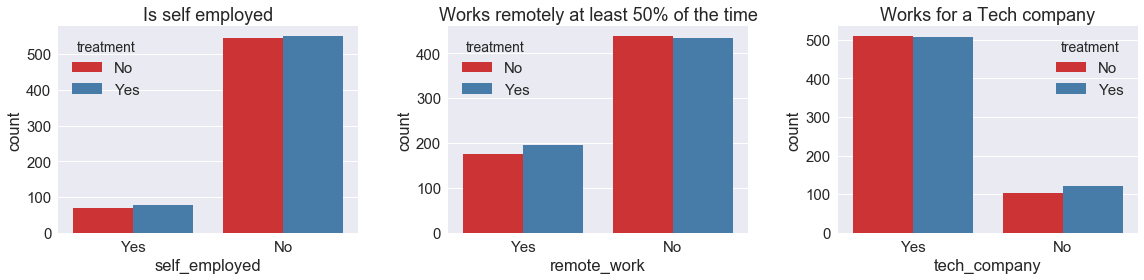

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))

axes[0].set_title('Is self employed')
sns.countplot(x='self_employed',hue='treatment',data=survey,ax=axes[0])

axes[1].set_title("Works remotely at least 50% of the time")
sns.countplot(x='remote_work',hue='treatment',data=survey,ax=axes[1])

axes[2].set_title("Works for a Tech company")
sns.countplot(x='tech_company',hue='treatment',data=survey,ax=axes[2])

fig.tight_layout()

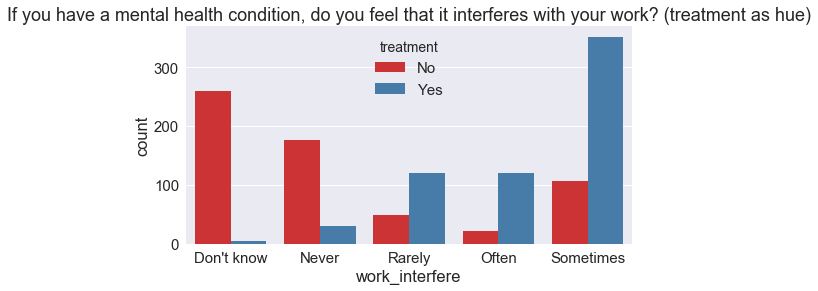

In [22]:
plt.figure(figsize=(8,4))
plt.title(questions['work_interfere']+ " (treatment as hue)")

sns.countplot(x='work_interfere', hue='treatment', data=survey, order=["Don't know", 'Never','Rarely','Often','Sometimes'])

plt.tight_layout
plt.show()

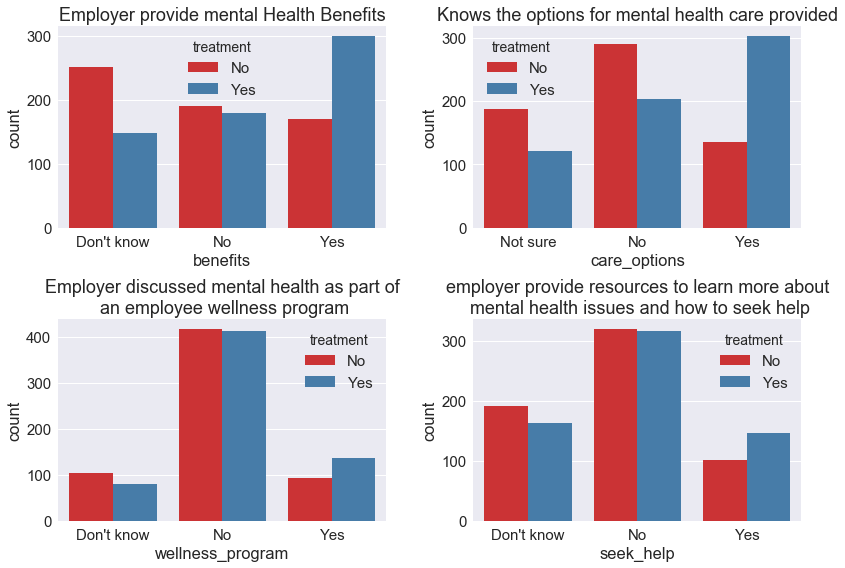

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0][0].set_title('Employer provide mental Health Benefits')
sns.countplot(x='benefits',hue='treatment',data=survey,ax=axes[0][0], order=["Don't know", "No", "Yes"])

axes[0][1].set_title("Knows the options for mental health care provided")
sns.countplot(x='care_options',hue='treatment',data=survey,ax=axes[0][1], order=["Not sure", "No", "Yes"])

axes[1][0].set_title('Employer discussed mental health as part of\n an employee wellness program')
sns.countplot(x='wellness_program',hue='treatment',data=survey,ax=axes[1][0], order=["Don't know", "No", "Yes"])

axes[1][1].set_title("employer provide resources to learn more about\n mental health issues and how to seek help")
sns.countplot(x='seek_help',hue='treatment',data=survey,ax=axes[1][1], order=["Don't know", "No", "Yes"])


fig.tight_layout()

- Most people are not self-employed, do not work remotely and are employees of a tech company, but none of seams to have a significant impact on the likelihood of the seeking treatment or not;
- We can see a clear trend in regards of the work interference: people who answered positively to this question are way more likely to seek treatment than those who responded negatively or didn’t answer;
- People who have sought treatment are more likely to know if their employer provides mental health benefits and the options that are available. Although the high number of negative answers suggests that companies might not give enough information on the topic nor encourage their employees to know more about it;

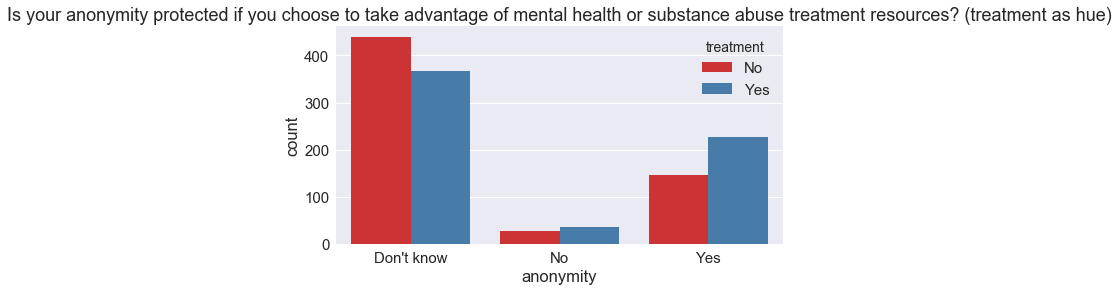

In [24]:
plt.figure(figsize=(8,4))
plt.title(questions['anonymity']+ " (treatment as hue)")

sns.countplot(x='anonymity', hue='treatment', data=survey, order=["Don't know", 'No', 'Yes'])

plt.tight_layout
plt.show()

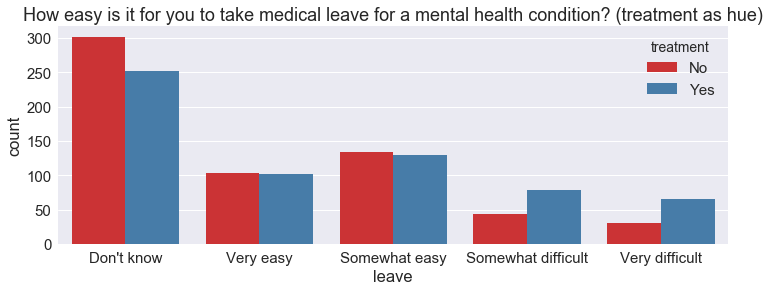

In [25]:
plt.figure(figsize=(12,4))
plt.title(questions['leave']+ " (treatment as hue)")

sns.countplot(x='leave', hue='treatment', data=survey, 
              order=["Don't know", 'Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult'])

plt.tight_layout
plt.show()

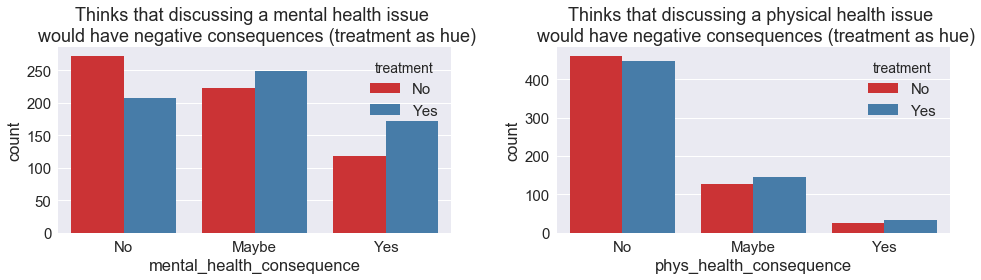

In [26]:

fig, axes = plt.subplots(1, 2, figsize=(14,4))

axes[0].set_title('Thinks that discussing a mental health issue \n would have negative consequences (treatment as hue)')
sns.countplot(x='mental_health_consequence', hue='treatment', data=survey, order=['No','Maybe', 'Yes'],ax=axes[0])

axes[1].set_title('Thinks that discussing a physical health issue \n would have negative consequences (treatment as hue)')
sns.countplot(x='phys_health_consequence', hue='treatment', data=survey, order=['No','Maybe', 'Yes'],ax=axes[1])


fig.tight_layout()
plt.show()

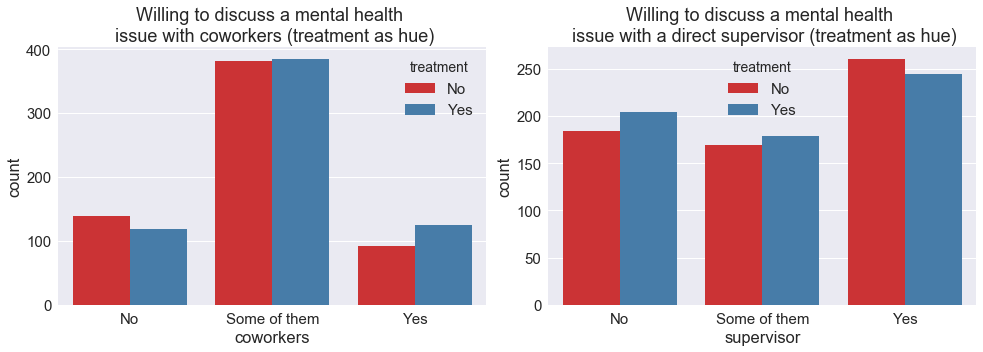

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].set_title('Willing to discuss a mental health \n issue with coworkers (treatment as hue)')
sns.countplot(x='coworkers', hue='treatment', data=survey, order=['No','Some of them', 'Yes'],ax=axes[0])

axes[1].set_title('Willing to discuss a mental health \n issue with a direct supervisor (treatment as hue)')
sns.countplot(x='supervisor', hue='treatment', data=survey, order=['No','Some of them', 'Yes'],ax=axes[1])


fig.tight_layout()
plt.show()

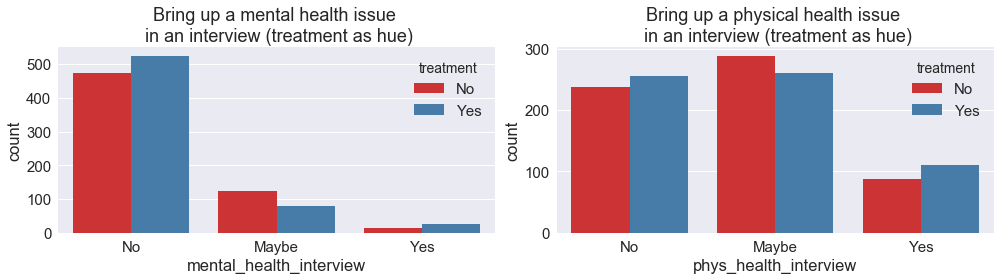

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

axes[0].set_title('Bring up a mental health issue \n in an interview (treatment as hue)')
sns.countplot(x='mental_health_interview', hue='treatment', data=survey, order=['No','Maybe', 'Yes'],ax=axes[0])

axes[1].set_title('Bring up a physical health issue \n in an interview (treatment as hue)')
sns.countplot(x='phys_health_interview', hue='treatment', data=survey, order=['No','Maybe', 'Yes'],ax=axes[1])

fig.tight_layout()
plt.show()

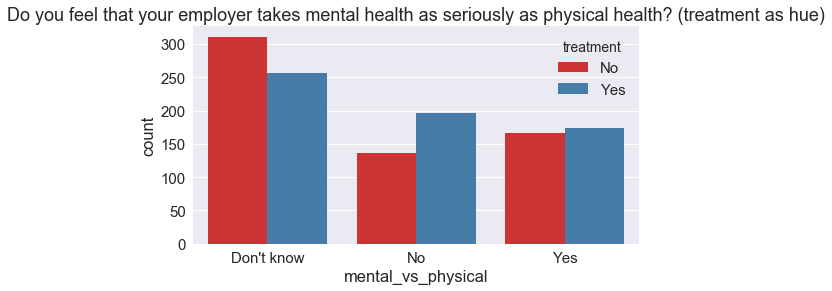

In [29]:
plt.figure(figsize=(8,4))
plt.title(questions['mental_vs_physical']+ " (treatment as hue)")

sns.countplot(x='mental_vs_physical', hue='treatment', data=survey, order=["Don't know", 'No','Yes'])

plt.tight_layout
plt.show()

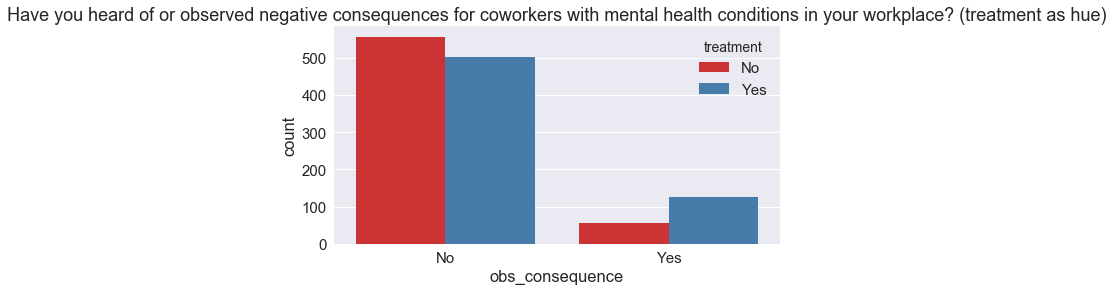

In [30]:
plt.figure(figsize=(8,4))
plt.title(questions['obs_consequence']+ " (treatment as hue)")

sns.countplot(x='obs_consequence', hue='treatment', data=survey, order=['No','Yes'])

plt.tight_layout
plt.show()

### 2.2 Treatment across the World

Now lets check the percentage of people who seek treatment per country

In [31]:
by_country = pd.DataFrame(columns=['country', 'percentage'])

In [32]:
by_country['country'] = survey['country'].unique()

In [33]:
def get_percentage (country):
    total = survey[survey['country'] == country]['treatment'].count()
    treated = survey[(survey['country'] == country) & (survey['treatment'] == 'Yes')]['treatment'].count()
    return (treated/total)*100

by_country['percentage'] = by_country['country'].apply(get_percentage)

In [34]:
by_country['percentage'].mean()

32.79984725867279

In [35]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = by_country['country'],
        locationmode = "country names",
        z = by_country['percentage'],
        text = by_country['country'],
        colorbar = {'title' : 'Percentage (%)'},
      ) 

layout = dict(title = 'Percentage of Emploees who seek treatment',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# 3. Encoding the data

A you can probably tell by now, almost all of the features in the dataset are categorical. In this scenario,  we must first encode this variables so that they are represented by numbers before we can try to fit the models. There are a number of ways to do this, and we have chosen to make two copies of our data frame: in one we are going to use Label Encoding, and in the other One-Hot Encoding. 

Later we will use Logistic Regression, K Nearest Neighbors and Random Forests in both data frames so that we can compare the performance of the models and also if the encoding method had any affect in the result.

To get started, lets check the unique values in each categorical feature, just to get an idea of what we are working with:

In [36]:
print("Unique values of each feature: \n")

survey.drop('country',axis=1, inplace = True)
features = ['gender'] + list(survey.columns[2:])

for col in features:
    print(col,": ", survey[col].unique())

Unique values of each feature: 

gender :  ['male' 'female' 'other/non-binary/trans']
self_employed :  ['Yes' 'No']
family_history :  ['Yes' 'No']
treatment :  ['No' 'Yes']
work_interfere :  ['Sometimes' "Don't know" 'Never' 'Often' 'Rarely']
no_employees :  ['1-5' '6-25' '100-500' '26-100' 'More than 1000' '500-1000']
remote_work :  ['Yes' 'No']
tech_company :  ['Yes' 'No']
benefits :  ['Yes' 'No' "Don't know"]
care_options :  ['Not sure' 'No' 'Yes']
wellness_program :  ['Yes' 'No' "Don't know"]
seek_help :  ["Don't know" 'No' 'Yes']
anonymity :  ['Yes' 'No' "Don't know"]
leave :  ['Very easy' 'Somewhat easy' 'Somewhat difficult' "Don't know"
 'Very difficult']
mental_health_consequence :  ['No' 'Maybe' 'Yes']
phys_health_consequence :  ['No' 'Maybe' 'Yes']
coworkers :  ['Yes' 'Some of them' 'No']
supervisor :  ['Yes' 'Some of them' 'No']
mental_health_interview :  ['No' 'Maybe' 'Yes']
phys_health_interview :  ['Yes' 'Maybe' 'No']
mental_vs_physical :  ['Yes' "Don't know" 'No']
obs_co

### 3.1 One-hot encoding

In [37]:
survey_onehot = pd.get_dummies(survey,drop_first=True)

In [38]:
survey_onehot.head()

,age,gender_male,gender_other/non-binary/trans,self_employed_Yes,family_history_Yes,treatment_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,46,1,0,1,1,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,1
1,36,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,29,1,0,0,1,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,31,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,46,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0


### 3.4 Label encoding

In [39]:
survey_label = survey.apply(LabelEncoder().fit_transform)

In [40]:
survey_label.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,28,1,1,1,0,4,0,1,1,2,...,2,4,1,1,2,2,1,2,2,1
1,18,1,1,1,0,0,4,1,1,1,...,2,2,1,1,1,1,0,0,0,0
2,11,1,0,1,1,4,1,0,1,2,...,1,1,0,1,1,1,1,1,1,0
3,13,1,1,0,0,1,0,1,1,1,...,2,1,1,1,1,1,1,0,2,0
4,28,1,0,0,1,2,2,1,1,2,...,0,0,0,1,1,2,1,0,1,0


# 4. Training models to predict if a person has sought treatment

With our new data frames at hand, we can start to fit our models and verify how well they can predict our desired outcome. 

First we are going to create the train and test sets of both data frames, then we will fit each model to the two sets and compare how they perform.


In [41]:
# one-hot encoded train and test sets
X1 = survey_onehot.drop('treatment_Yes', axis=1)
y1 = survey_onehot['treatment_Yes']

In [42]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=420)

In [43]:
# label encoded train and test sets
X2 = survey_label.drop('treatment', axis=1)
y2 = survey_label['treatment']

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=420)

In [45]:
precision = pd.DataFrame(columns=['encoding', 'model', 'true negative precision', 'true positive precision', 'avg precision'])

### 4.1 Logistic Regression

In [46]:
reg1 = LogisticRegression()
reg1.fit(X_train1,y_train1)
reg_pred1 = reg1.predict(X_test1)

In [47]:
print(confusion_matrix(y_test1,reg_pred1))

[[137  53]
 [ 25 158]]


In [48]:
print(classification_report(y_test1,reg_pred1))

             precision    recall  f1-score   support

          0       0.85      0.72      0.78       190
          1       0.75      0.86      0.80       183

avg / total       0.80      0.79      0.79       373



In [49]:
reg2 = LogisticRegression()
reg2.fit(X_train2,y_train2)
reg_pred2 = reg2.predict(X_test2)

In [50]:
print(confusion_matrix(y_test2,reg_pred2))

[[137  53]
 [ 27 156]]


In [51]:
print(classification_report(y_test2,reg_pred2))

             precision    recall  f1-score   support

          0       0.84      0.72      0.77       190
          1       0.75      0.85      0.80       183

avg / total       0.79      0.79      0.78       373



### 4.2 K Nearest Neighbors

In [52]:
# # ELBOW METHOD
# error_rate = []

# for i in range(1,100):
#     knn1 = KNeighborsClassifier(n_neighbors=i)
#     knn1.fit(X_train1,y_train1)
#     knn_pred1 = knn.predict(X_test1)
#     error_rate.append(np.mean(knn_pred1 != y_test1))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=20)
knn1.fit(X_train1,y_train1)
knn_pred1 = knn1.predict(X_test1)

In [54]:
print(confusion_matrix(y_test1,knn_pred1))

[[170  20]
 [102  81]]


In [55]:
print(classification_report(y_test1,knn_pred1))

             precision    recall  f1-score   support

          0       0.62      0.89      0.74       190
          1       0.80      0.44      0.57       183

avg / total       0.71      0.67      0.65       373



In [56]:
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(X_train2,y_train2)
knn_pred2 = knn2.predict(X_test2)

In [57]:
print(confusion_matrix(y_test2,knn_pred2))

[[137  53]
 [ 39 144]]


In [58]:
print(classification_report(y_test2,knn_pred2))

             precision    recall  f1-score   support

          0       0.78      0.72      0.75       190
          1       0.73      0.79      0.76       183

avg / total       0.76      0.75      0.75       373



### 4.3 Random Forest

In [59]:
forest1 = RandomForestClassifier(n_estimators=300)
forest1.fit(X_train1,y_train1)
forest_pred1 = forest1.predict(X_test1)

In [60]:
print(confusion_matrix(y_test1,forest_pred1))

[[141  49]
 [ 22 161]]


In [61]:
print(classification_report(y_test1,forest_pred1))

             precision    recall  f1-score   support

          0       0.87      0.74      0.80       190
          1       0.77      0.88      0.82       183

avg / total       0.82      0.81      0.81       373



In [62]:
forest2 = RandomForestClassifier(n_estimators=300)
forest2.fit(X_train2,y_train2)
forest_pred2 = forest2.predict(X_test2)

In [63]:
print(confusion_matrix(y_test2,forest_pred2))

[[140  50]
 [ 20 163]]


In [64]:
print(classification_report(y_test2,forest_pred2))

             precision    recall  f1-score   support

          0       0.88      0.74      0.80       190
          1       0.77      0.89      0.82       183

avg / total       0.82      0.81      0.81       373



In [69]:
df_report = report_DataFrame(classification_report(y_test2,forest_pred2))
df_report


,precision,recall,f1-score,support
0,0.88,0.74,0.80,190.0
1,0.77,0.89,0.82,183.0


In [66]:
def my_sum(arg):
    arg = 3

In [67]:
a = 2
my_sum(a)
a

2

# 5. Most important features

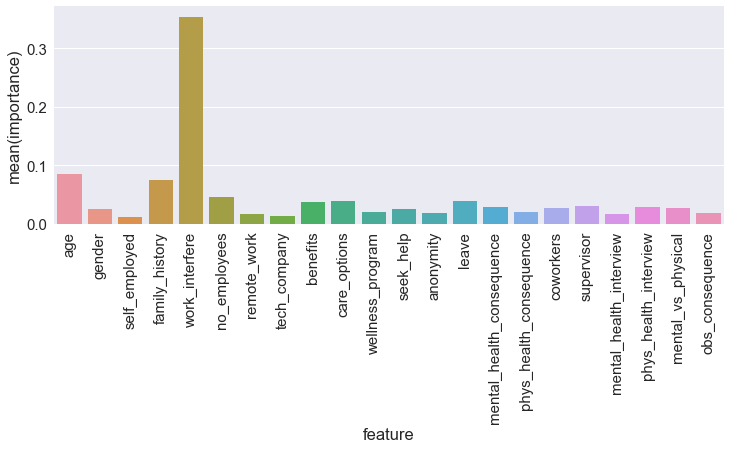

In [68]:
feature_importance = pd.DataFrame(columns=['feature', 'importance', 'std'])

feature_importance['feature'] = list(X_train2.columns)
feature_importance['importance'] = forest2.feature_importances_
feature_importance['std'] = np.std([tree.feature_importances_ for tree in forest2.estimators_],axis=0)


plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.barplot(x='feature',y='importance',data=feature_importance)

# 6. Conclusion